#**Installing and Importing Necessary Libraries**

In [ ]:
!apt-get install -y tesseract-ocr  
!pip install pytesseract  

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [15]:
import cv2          
import numpy as np   
import pytesseract   
import cv2 
import os           


#**Defining Helper Functions**

##**Preprocessing the Image**

Converts the image to grayscale, denoises it, and applies binary thresholding for easier text detection.

In [ ]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(gray)       
    thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]  
    return thresh

##**Detecting Text Regions**

Detects text regions in the image and returns information like position, confidence, and text content in a dictionary.

In [ ]:
def detect_text_regions(image):
    # Detecting words
    boxes = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)  
    return boxes

##**Drawing Bounding Boxes**

Draws bounding boxes around text regions with confidence scores above 60%.

In [ ]:
def draw_bounding_boxes(image, boxes):
    output = image.copy()  
    n_boxes = len(boxes['level'])  # Total number of detected text regions
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:  # Only consider boxes with confidence > 60%
            (x, y, w, h) = (boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i])  # Box coordinates
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle on the image
    return output


##**Extracting Detected Text**

Extracts and combines the detected text into a single string.

In [ ]:
def get_detected_text(boxes):
    detected_text = []
    n_boxes = len(boxes['level'])  # Total number of detected boxes
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:  # Only extract text with confidence > 60%
            detected_text.append(boxes['text'][i])  # Append detected text
    return ' '.join(detected_text)  # Combine text into a single string


#**Uploading and Reading the Image**

Prompts the user to upload an image, retrieves the file, and reads it using OpenCV.

In [11]:
image_path = "F:/shivani/DL_assignments/DL_5/image.png"

image = cv2.imread(image_path)  # Read the image

#**Processing and Displaying Results**

Displays the original image, preprocesses it, detects text regions, draws bounding boxes, and prints the extracted text.



Original Image:


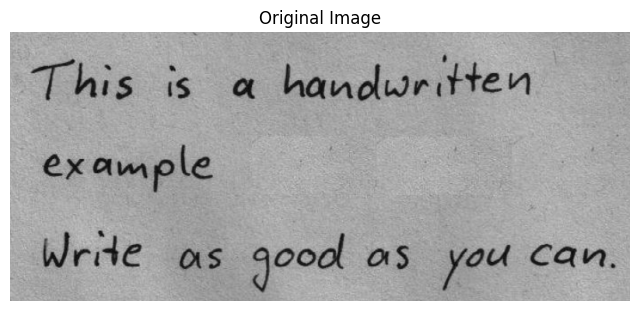


Image with Text Detection Regions:


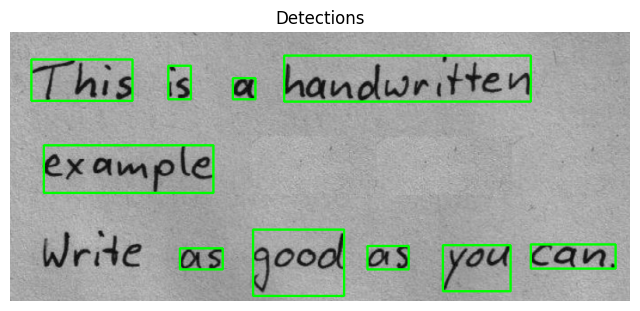


Detected Text:
This is a handwritten example as qooal as you Can,


In [ ]:
import cv2
import sys

def show_image(img, title="Image"):
    """
    Display an image robustly:
    - If google.colab.patches.cv2_imshow is available, use it (Colab).
    - Else if running inside Jupyter, use matplotlib.
    - Else fall back to cv2.imshow (desktop).
    """
    try:
        from google.colab.patches import cv2_imshow as _cv2_imshow
    except Exception:
        _cv2_imshow = None

    if _cv2_imshow is not None:
        _cv2_imshow(img)
        return

    try:
        get_ipython  # will raise NameError outside IPython/Jupyter
        in_ipython = True
    except NameError:
        in_ipython = False

    if in_ipython:
        import matplotlib.pyplot as plt
        # Matplotlib expects RGB; convert from BGR
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8,6))
        plt.imshow(img_rgb)
        plt.axis("off")
        plt.title(title)
        plt.show()
        return

    # Fallback to cv2.imshow for local scripts (opens a window)
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Make sure image_path is defined earlier, then read it:
image_path = globals().get("image_path", None)
if image_path is None:
    raise ValueError("Please set `image_path` to the path of your image file before running this cell.")

image = cv2.imread(image_path)
# Check if image was successfully read
if image is None:
    print(f"Error: Unable to read the image file: {image_path}")
else:
    # Display original image
    print("\nOriginal Image:")
    show_image(image, title="Original Image")

    # Ensure helper functions exist (these should be defined elsewhere in your notebook/script)
    for fn in ("preprocess_image", "detect_text_regions", "draw_bounding_boxes", "get_detected_text"):
        if fn not in globals():
            raise NameError(f"Required function `{fn}` is not defined. Please define it before running this cell.")

    # Preprocess the image and detect text regions
    preprocessed = preprocess_image(image)              
    boxes = detect_text_regions(preprocessed)         

    # Draw bounding boxes on original image (make a copy to avoid modifying original)
    image_with_boxes = draw_bounding_boxes(image.copy(), boxes)

    # Display the image with bounding boxes
    print("\nImage with Text Detection Regions:")
    show_image(image_with_boxes, title="Detections")

    # Extract and print the detected text
    detected_text = get_detected_text(boxes)
    print("\nDetected Text:")
    print(detected_text)
